In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

In [ ]:
user_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recommender/converted_csv/arts_crafts3.csv')

In [ ]:
user_ratings.drop_duplicates(inplace=True)

In [ ]:
user_ratings_df=user_ratings.pivot_table(index='userId',columns='title',values='overall')

In [ ]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

0.9978783931684727


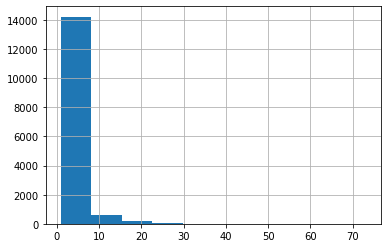

In [ ]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()

# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()

# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

In [ ]:
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=0)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

userId
A100UXMXYOQU1X    3.526850e-19
A101J6GA17GRXS    0.000000e+00
A1031HVG5I7I7F    2.939042e-19
A10606LWXYSYEK   -6.465892e-19
A108EWXVE4BHQO   -2.939042e-19
                      ...     
AZJFLPEG7D09G     5.584179e-19
AZOJ1NLQFHDZC     0.000000e+00
AZRKBGNZ5P5TN     6.465892e-19
AZVK1493WP0GL     1.763425e-19
AZVYPTIFPGOPH     0.000000e+00
Length: 1444, dtype: float64


In [ ]:
# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[11.05136537  0.          0.          0.          0.          0.        ]
 [ 0.         11.08259952  0.          0.          0.          0.        ]
 [ 0.          0.         11.53310135  0.          0.          0.        ]
 [ 0.          0.          0.         12.6474609   0.          0.        ]
 [ 0.          0.          0.          0.         12.85440202  0.        ]
 [ 0.          0.          0.          0.          0.         13.40319191]]


In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
print(user_ratings_df)

title           #1 ULTIMATE 10,000 Rainbow Colored Loom Rubber Band Refill Jewelry Kit -1k S-Clips, 50 Charms, 10 Hooks, Glow in Dark, Color Changing, Stripes, Glitter, Flower, Neon &amp; Solid -100% Compatible all Looms  ...  yueton?Pack of 50 DIY Heart Charms Pendants for Making Bracelet and Necklace
userId                                                                                                                                                                                                                        ...                                                                              
A100UXMXYOQU1X                                           4.571435                                                                                                                                                             ...                                           4.571428                           
A101J6GA17GRXS                                           5.000000                       

In [ ]:
# Extract the ground truth to compare your predictions against
actual_values = user_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

0.026315769855632956


In [ ]:
calc_pred_ratings_df.loc['A6AXEYMX5DJPD'].sort_values(ascending=False)

title
Comfort Grip Crochet Hook 10/Pkg - Assorted Colors (one color per package)                                                                   4.492592
Lion Brand Yarn Lion Brand Homespun Thick &amp; Quick Yarn (436) Claret, 160 yd/146 m                                                        4.491797
Lily Sugar 'N Cream  The Original Solid Yarn - (4) Medium Gauge 100% Cotton - 2.5 oz -  Sage Green  -  Machine Wash &amp; Dry                4.489087
Lily 10200101628 Sugar 'N Cream  The Original Solid Yarn - (4) Medium Gauge 100% Cotton - 2.5 oz -  Hot Orange  -  Machine Wash &amp; Dry    4.489087
Clover 3142 Yarn Threader                                                                                                                    4.488821
                                                                                                                                               ...   
Beadaholique EC-4975 Mr. Kitty's Big Bead Bonanza Beads Mix, 1/2-Pound                        

In [ ]:
calc_pred_ratings_df

title,"#1 ULTIMATE 10,000 Rainbow Colored Loom Rubber Band Refill Jewelry Kit -1k S-Clips, 50 Charms, 10 Hooks, Glow in Dark, Color Changing, Stripes, Glitter, Flower, Neon &amp; Solid -100% Compatible all Looms",#10 English Beading Needles,#2/0 (Medium) Square Braided Wick: 100 foot Spool,#20 Solid Gold - Needloft Craft Cord 2 Pack 40 Yards (2x20yds),#24PLY/FT Braided Wick: 100 foot Spool,#4 (Large) Square Braided Wick: 75 foot Spool,$15 SPECIAL THIS WEEK ONLY! Chalk This Way Neon Liquid Chalk Markers - 10 Pack. Includes 48 Chalkboard Labels FREE!,"&quot;Home&quot; Button Sticker for iphone/ipad/itouch, Froggy, 6 Stickers",&quot;Over the Back&quot; Fusible Interlining Embroidery Backing 8 Inches by 10 Yards,(10 Strands) Cat-6mm-Assorted Cat's Eye Beads 6mm,(10 Strands) Cat-8mm-Assorted Cat's Eye Beads 8mm,(100) in a Bag Soft Mini Daisy Flowers~2&quot; 2 Inch Small Flowers Great for Craft Projects,(28 piecess) Aqua Shabby Chiffon Fabric Flowers 2.5&quot; Shabby Rose Trim 2 Yards,(4) 220 YD Spools Aurifil 50 wt Quilter's Super Set of Essential Piecing Thread Colors Bundle of 4 Spools,(50) CheckOutStore Plastic Storage Cases for Rubber Stamps (Clear/Spine: 21 mm),(6) Assorted Large Eye Beading Needles In 4 Sizes,"(G1-PS+Free Wigs) Realistic Standing Female Adult Plastic Mannequin, Turnable Head, Rotate Arms, Flesh Tone+Base+1 Free Wig",(Ship from USA) Open Toe Free Motion Quilting Darning Spring Foot #4130376-46 for many Viking Sewing Machines,"(Stage 1) Wood and Leather Pyrography Pen - Best Woodburning and Leather Crafts Tool Kit - Comes with 21 Different Tips - Dual Power Mode - 30W and 15W, Gourd",*Fancy Style* -Easy to Grab- Rubber Ear Nuts- Clear Earring Safety Backs (100),*SALE* 9 GLITTER Tulle Rolls each one 6&quot; By 30 Ft,-16 Feet Chain Vintage Antique Bronze Plated Twisted Cross and ball Chains-Jewelry Making chain (A),-8 Sheets Korea DIY Kawaii Diary PrettyZoo Animals Sticker Set - Deco Translucent Sticker Set,0.5mm Diameter Stretch Magic Bead Jewelry Elastic Cord Line Clear Black 10 meter,0.75mm Diameter Braided Nano Cord 300 FT (Approx) Spools Various Colors,0.8mm 1 roll Polyester Leathercraft Small Waxed Thread for Leather Sewing,"002LBO Ornate Victorian Frame Setting Silicone Push Mold - Jewelry, Charms (Clay Fimo Casting Resin Wax Gum Paste Fondant)",009LBF Kawaii Cute Fashion Bow Bowknot Fondant Silicone Mold for Cake Cookie Decorating Chocolate Soap Epoxy Clay Fimo Clay,"034LBH Chinese Redbud Hongkong Flower Mold - Jewelry, Charms, Cupcake (Clay, Fimo, Casting Resin, Wax, Soap, Gum Paste, Fondant)",040LBX IceCream Scoop 18mm Silicone Mold Decoden Miniature Sweets Mold Fimo Polymer Clay Jewelry Cabochon Charms,041LBH Flower / Rose Silicone Flexible Push Mold Miniature Food Sweets Jewelry Charms (Clay Fimo Resin Epoxy Gum Paste Fondant),"042LBH Flower Cluster Cameo Silicone Push Mold - Miniature Food, Sweets, Jewelry, Charms (Clay Fimo Resin Gum Paste Fondant)",054LBH Bright Flower Flexible Silicone Push Mold Mini Resin Mold Fondant Gumpaste (Clay Fimo Resin Wax Epoxy Gum Paste Fondant),1 Box Colorful Royal Tailor's Chalk,1 Pair Bobbin Box Organizers with 28 Threaded Bobbins,1 Set of 6 Useful Leather Cloth Overstitch Wheel with Awl Tool Pin Sewing Punching Hole Maker,1 Strand (34inches) of Real Natural Iolite Gemstone Chips Beads. wholesale price. Prepared exclusively by GemMartUSA.,1 Strand-Rainbow Moonstone Micro Faceted Rondelle 3-4mm 13&quot; Length AAAmazing Blue Luster 100 Percent Natural (RLRM-70002),1 X 100 Silver Plated Hypo-Allergenic Earring Hooks 15mm,1 X 12 Super-lon #18 Cord Ideal for Stringing Beading Crochet and Micro-macram Jewelry Compatible with Kumihimo Projects S-lon Spring Mix,...,me &amp; my BIG ideas Teal Rings,"my art tools Series Sketch Pads 13 inch by 5.5 inch, Mix Media Paper pad, 2 Pack Large Landscape Sketch Books for a Watercolor wash, Drawing -Journal for Dry and Wet Media, 84 Sheets,150 Pound /220g","mysonder Scissors, Shears for Office, School, Kitchen, Sewing, Art and Craft Ac

**write result pivot model to csv**

In [ ]:
p = calc_pred_ratings_df.assign()

In [ ]:
p1 = pd.DataFrame(columns=p.columns, index=[p.index.name]).append(p)
p1.to_csv('/content/drive/MyDrive/Colab Notebooks/recommender/converted_csv/arts_crafts_result.csv',index_label=p.columns.name)